### Homework 5 ###
Cindy Wu (ccw2145) <br>
Sharon Tsao (sjt2141)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

In [30]:
train = pd.read_csv('hw5_data_train.csv')
test = pd.read_csv('hw5_data_test.csv')

In [4]:
train.head()

,Title,Review,Recommended
0,Beautiful unique dress,Wore this to my sons wedding. found it last mi...,1
1,Had high hopes but...,"Gals, if you absolutely must have this top wai...",0
2,Buttons -buttons so cute!,I hardly believe i have not reviewed htis yet....,1
3,Love this dress,This dress is so cute and comfortable. i'm nor...,1
4,Perfect summer pants!,The linen- cotton blend breathes so well for a...,1


In [5]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

### Task 1 Title and Body (30Pts) ### 
We will look at four ways to use the data <br>
1) Use the title only <br>
2) Use the review body only <br>
3) Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body) <br>
4) Vectorizing title and review individually and concatenating the vector representations. <br>

Use CountVectorizer with the default settings and train a linear classifier. Visualize the 20 most
important features in the linear model. Tune the regularization parameter of the classifier, and
visualize the 20 most important features after regularization.
Do this for all 4 settings. Which one works best?
For the simplicity, for the remaining tasks, we will work with option 3), concatenating the texts.

In [9]:
#1.1 
#Preprocessing and Dropping Na's

train_clean = train[['Title','Recommended']]
train_clean = train_clean.dropna()
title_train = train_clean['Title']
y_train = train_clean['Recommended']

In [18]:
vector = CountVectorizer(encoding='utf-8')
X_train_title = vector.fit_transform(title_train.values.astype('U'))
feature_names = vector.get_feature_names()
#print(feature_names)
lr = LogisticRegressionCV().fit(X_train_title, y_train)
#print(X_train)
#score = cross_val_score(lr, X_train_review, y_train, cv= 5)

In [19]:
score = cross_val_score(lr, X_train_title, y_train, cv= 5, scoring = 'roc_auc')
print('Average AUC Score:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC Score:
0.9202189700024699
Best parameter:
[2.7825594]


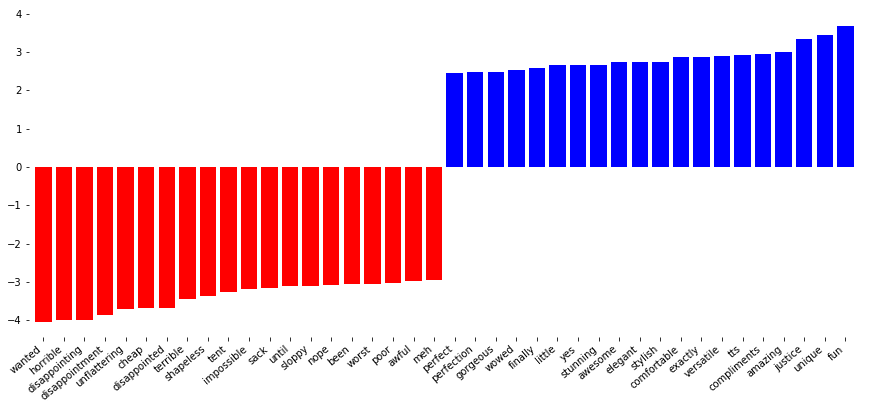

In [21]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [60]:
#1.2
train_clean = train[['Review','Recommended']]
train_clean = train_clean.dropna()
review_train = train_clean['Review']
y_train = train_clean['Recommended']

In [61]:
vector = CountVectorizer(encoding='utf-8')
X_train_review = vector.fit_transform(review_train.values.astype('U'))
feature_names = vector.get_feature_names()
#print(feature_names)
lr = LogisticRegressionCV().fit(X_train_review, y_train)
#print(X_train)
#score = cross_val_score(lr, X_train_review, y_train, cv= 5)

In [62]:
score = cross_val_score(lr, X_train_review, y_train, cv= 5, scoring = 'roc_auc')
print('Average AUC:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC:
0.9233851764829654
Best parameter:
[0.35938137]


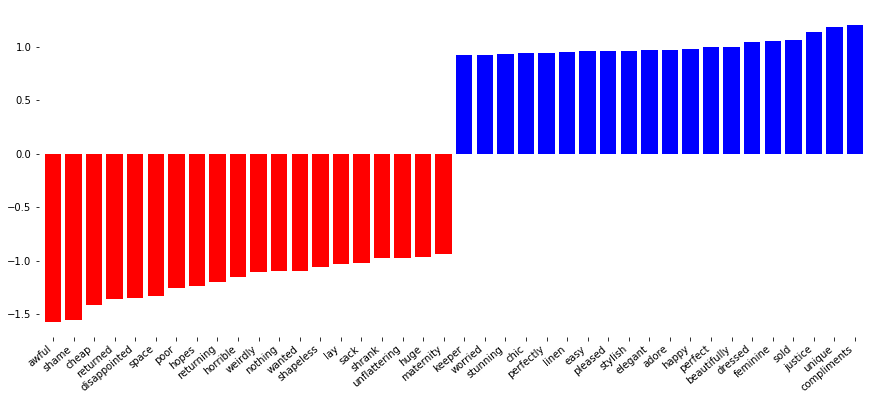

In [63]:
#feature_names = vect.get_feature_names()
# print(feature_names[:10])
# print(feature_names[1000:1020])
# print(feature_names[::200])

plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [33]:
#1.3 
# Preprocessing and Drop NA's

train['Both'] = train['Review'].astype(str) + ' ' + train['Title'].astype(str)
train_clean = train[['Both', 'Recommended']]
train_clean = train_clean.dropna()
text_train = train_clean['Both']
y_train = train_clean['Recommended']

In [34]:
vector = CountVectorizer(encoding='utf-8')
X_train_both = vector.fit_transform(text_train.values.astype('U'))
feature_names = vector.get_feature_names()
#print(feature_names)
lr = LogisticRegressionCV().fit(X_train_both, y_train)
#print(X_train)
#score = cross_val_score(lr, X_train_both, y_train, cv= 5)

In [69]:
score = cross_val_score(lr, X_train_both, y_train, cv= 5, scoring = 'roc_auc')
print('Average AUC:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC:
0.9377245962717851
Best parameter:
[0.35938137]


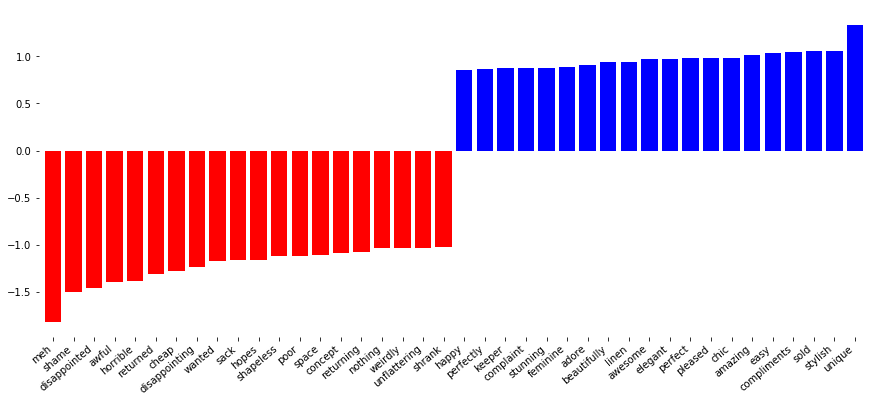

In [46]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [107]:
#1.4 Preprocessing and Drop Na's
train_clean = train.dropna()
review_train = train_clean['Review']
title_train = train_clean['Title']
y_train = train_clean['Recommended']
# text_train = train[['Title', 'Review']]

In [108]:
vector_review = CountVectorizer(encoding='utf-8')
X_train_review = vector_review.fit_transform(review_train.values.astype('U'))
feature_names_review = vector_review.get_feature_names()

vector_title = CountVectorizer(encoding='utf-8')
X_train_title = vector_title.fit_transform(title_train.values.astype('U'))
feature_names_title = vector_title.get_feature_names()

feature_names_concat = feature_names_review + feature_names_title

In [109]:
print(X_train_concat.shape)
print(y_train.shape)

(17614, 15774)
(14762,)


In [110]:
X_train_concat = hstack([X_train_review, X_train_title])
lr = LogisticRegressionCV().fit(X_train_concat, y_train)

In [111]:
score = cross_val_score(lr, X_train_concat, y_train, cv= 5, scoring = 'roc_auc')
#print(score)
print('Average AUC:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC:
0.9428239080510048
Best parameter:
[0.35938137]


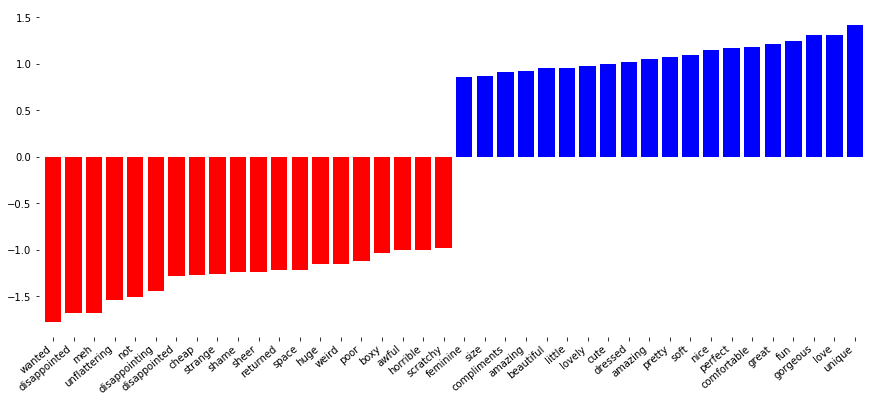

In [112]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names_concat), top_n=20, rotation=40)
ax = plt.gca()
plt.show()

Based on the four methods that we've used, the best method is the fourth method. Hence, we test our test set with the fourth method as shown below.

In [113]:
test_clean = test.dropna()
review_test = test_clean['Review']
title_test = test_clean['Title']
y_test = test_clean['Recommended']

In [114]:
# Test with best model
vector = CountVectorizer(encoding='utf-8')
X_train_title = vector.fit_transform(title_train.values.astype('U'))
X_test_title = vector.transform(title_test.values.astype('U'))

vector = CountVectorizer(encoding='utf-8')
X_train_review = vector.fit_transform(review_train.values.astype('U'))
X_test_review = vector.transform(review_test.values.astype('U'))

X_train_concat = hstack([X_train_review,X_train_title])
X_test_concat = hstack([X_test_review,X_test_title])
lr = LogisticRegressionCV(random_state = 0).fit(X_train_concat, y_train)

score = roc_auc_score(y_test, lr.predict(X_test_concat))
print ("Test Average AUC: {}".format(np.mean(score)))

Test Average AUC: 0.8258526307868848


In [ ]:
# (Tune parameters for linear models) 

### Task 2 Feature Tuning (30Pts) ###
2.1 Try using TfidfVectorizer instead of CountVectorizer. Does it change the score? Does it
change the important coefficients? <br>
2.2 Remember that TfidfVectorizer uses normalization by default. Does using a Normalizer with
CountVectorizer change the outcome? <br>
2.3 Try using stop-word. Do the standard English stop-words help? Why / why not? <br>
2.4 Limit the vocabulary using min_df or max_df. How to these impact the number of features,
and how do they impact the scores? <br>

In [31]:
# Preprocessing with task 1 option 3
train['Both'] = train['Review'].astype(str) + ' ' + train['Title'].astype(str)
train_clean = train[['Both', 'Recommended']]
train_clean = train_clean.dropna()
text_train = train_clean['Both']
y_train = train_clean['Recommended']

In [116]:
# 2.1
vector = TfidfVectorizer(encoding='utf-8')
X_train_both = vector.fit_transform(text_train.values.astype('U'))
feature_names = vector.get_feature_names()
lr = LogisticRegressionCV().fit(X_train_both, y_train)
#print(X_train)


In [117]:
score = cross_val_score(lr, X_train_both, y_train, cv= 5, scoring = 'roc_auc')
print('Average AUC:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC:
0.9486524123227886
Best parameter:
[2.7825594]


In [118]:
#feature_names = vect.get_feature_names()
# print(feature_names[:10])
# print(feature_names[1000:1020])
# print(feature_names[::200])
# print(lr.C_)

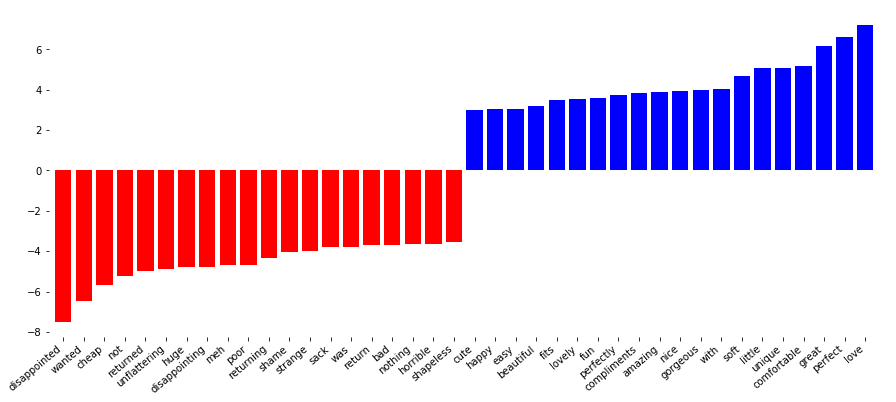

In [119]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

The score improves by a little bit, from 0.9377 to 0.9487. A lot of the top coefficients are still the same but not weighed/ordered the same way. For example, in 1.3, the most negative coefficient was "meh" and "meh" also appeared in 2.1 as the 9th most negative coefficient. Similarly, the most negative coefficient in 2.1 is "disappointed" and it appeared as the third most negative in 1.3. 

In [41]:
#2.2
vector = make_pipeline(CountVectorizer(), Normalizer())
X_train_both = vector.fit_transform(text_train.values.astype('U'))
lr = LogisticRegressionCV().fit(X_train_both, y_train)
#feature_names = vector.get_feature_names()
#print(feature_names)

In [42]:
score = cross_val_score(lr, X_train_both, y_train, cv= 5, scoring = 'roc_auc')
print('Average AUC:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC:
0.9453376592950071
Best parameter:
[21.5443469]


The outcome didn't change much when swapped to using a CountVectorizer with Normalizer. The scores went down from 0.9487 to 0.9453. 


In [131]:
#2.3
vectorizer = TfidfVectorizer(encoding='utf-8', stop_words='english')
X_train_both = vectorizer.fit_transform(text_train.values.astype('U'))
feature_names = vectorizer.get_feature_names()
#print(feature_names)
lr = LogisticRegressionCV().fit(X_train_both, y_train)
#print(X_train)

In [132]:
score = cross_val_score(lr, X_train_both, y_train, cv= 5, scoring = 'roc_auc')
print('Average AUC:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average AUC:
0.9429490137969534
Best parameter:
[2.7825594]


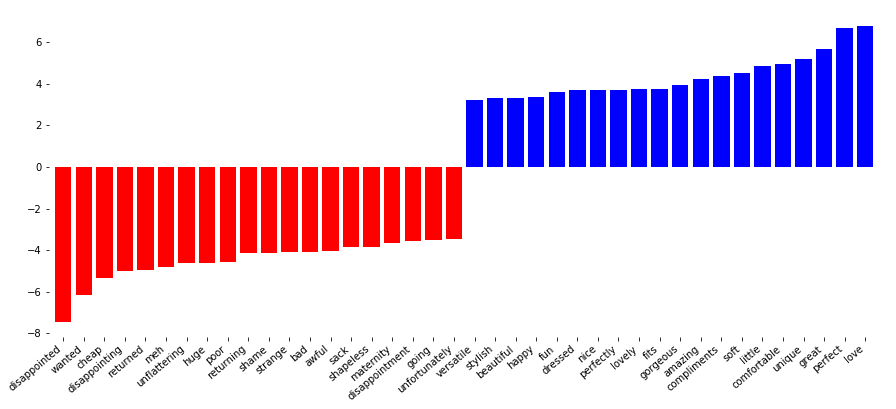

In [133]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [134]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(list(ENGLISH_STOP_WORDS))

['also', 'three', 'yet', 'few', 'into', 'latterly', 'show', 'toward', 'were', 'ever', 'whom', 'might', 'somehow', 'side', 'ten', 'are', 'sincere', 'neither', 'sometime', 'hers', 'its', 'less', 'bill', 'nobody', 'someone', 'their', 'whereby', 'an', 'he', 'nine', 'whereafter', 'enough', 'therefore', 'further', 'anywhere', 'anyhow', 'can', 'five', 'behind', 'during', 'by', 'give', 'around', 'against', 'anyone', 'often', 'herein', 'himself', 'beside', 'onto', 'too', 'put', 'where', 'your', 'ie', 'co', 'mine', 'call', 'upon', 'about', 'meanwhile', 'same', 'his', 'hasnt', 'towards', 'each', 'seem', 'wherever', 'whenever', 'is', 'been', 'latter', 'describe', 'front', 'it', 'yours', 'those', 'my', 'more', 'six', 'whereupon', 'without', 'what', 'hence', 'eleven', 'fire', 'her', 'namely', 'many', 're', 'some', 'thereafter', 'ourselves', 'itself', 'but', 'already', 'couldnt', 'none', 'least', 'well', 'everything', 'nor', 'see', 'on', 'so', 'keep', 'amount', 'next', 'than', 'rather', 'serious', 't

Using English stop words lower the score went down a little bit. It's hard to say whether the change is significant or not, but we can see that the english stop words have removed a few words that are actually important. For example, "not" was one of the top negative coefficient, but we can see that is one of the stop words. "With" is another top word that was removed; "with" is often used in reviews when "I can wear this with anything!". Removing "with" could have contribute to the lowering of the score. 

In [50]:
#2.4
param_grid = {'tfidfvectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
             'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]
} 

pipe = make_pipeline(TfidfVectorizer(encoding='utf-8'), LogisticRegression(), memory = 'cache_folder')

grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring = 'roc_auc')

grid.fit(text_train.values.astype('U'), y_train)
print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameter: {}".format(grid.best_params_))


best mean cross-validation score: 0.94753
best parameter: {'logisticregression__C': 1, 'tfidfvectorizer__max_df': 0.6}


In [79]:
#For feature length comparison purposes only

vect = TfidfVectorizer(encoding='utf-8')
X_normal = vect.fit_transform(text_train.values.astype('U'), y_train)

vect = TfidfVectorizer(encoding='utf-8', max_df = 0.6)
X_max_df = vect.fit_transform(text_train.values.astype('U'), y_train)

In [80]:
print("Shape of Original Dataset:")
print(X_normal.shape)
print("Shape of Dataset at max_df = 0.6:")
print(X_max_df.shape)

Shape of Original Dataset:
(17614, 13011)
Shape of Dataset at max_df = 0.6:
(17614, 13006)


The scores were higher than using stop words. We've tried optimizing the scores with max_df, which gives you a limit to a document of word appears. This means that if a word appears too many times, it'd get thrown out. This works well when max_df is 0.6. From viewing the length, the unaltered document length is 13011, which is only a little bit more than where max_df = 0.6. This means that there are only a few words that appear very often in the English language were removed, and the words that were removed did not add much to the sentiment of the recommendation. 

In [222]:
# Test with best model
# Preprocessing test data: combine review and title and then drop nas
test['Both'] = test['Review'].astype(str) + ' ' + test['Title'].astype(str)
test_clean = test[['Both', 'Recommended']].dropna()
text_test = test_clean['Both']
y_test = test_clean['Recommended']

In [210]:
# Test with best model
vector = TfidfVectorizer(encoding='utf-8')
X_train_both = vector.fit_transform(text_train.values.astype(str))
#feature_names = vector.get_feature_names()
lr = LogisticRegression(random_state = 0, C= 2.7825594).fit(X_train_both, y_train)

In [211]:
X_test_tv = vector.transform(text_test.values.astype(str))
score = roc_auc_score(y_test, lr.predict(X_test_tv))
print("\nVocabulary size with unigram and TfidfVectorizer = 2: {}".format(len(vectorizer.vocabulary_)))
print ("Test Average AUC: {}".format(score))


Vocabulary size with unigram and TfidfVectorizer = 2: 7478
Test Average AUC: 0.8020337736593413


### Task 3 n-grams (30Pts) ###
3.1 Using your current best model, try changing from unigrams to n-grams of varying length. What provides the best performance? Visualize the coefficients. Try visualizing only the higher-order n-grams that are important. <br>
3.2 Try using character n-grams. Visualize the coefficients. Can we learn something from this? <br>
3.3 Investigate how min_df and the use of stop-words changes the number of features when using word n-grams, and how they change the score. 

Our best model so far uses combined title and reviews data, and TfidfVectorizer

In [216]:
# 3.1 Using best model from task 2 [TfidfVectorizer and logreg C = 2.782559] with grid search for ngrams
param_grid = {"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3),(1,4),
                                               (2, 3), (2, 5), (3, 8), (5, 5)]}
grid = GridSearchCV(make_pipeline(TfidfVectorizer(), LogisticRegression(random_state=0, C= 2.7825594)),
                    param_grid=param_grid, cv=5, scoring="roc_auc")
grid.fit(text_train.values.astype(str), y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...nalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 3), (2, 5), (3, 8), (5, 5)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [219]:
lr = grid.best_estimator_.named_steps['logisticregression']
tv = grid.best_estimator_.named_steps['tfidfvectorizer']

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameter: {}".format(grid.best_params_))
print("vocabulary size with best n-grams: {}".format(len(tv.vocabulary_)))

best mean cross-validation score: 0.95401
best parameter: {'tfidfvectorizer__ngram_range': (1, 2)}
vocabulary size with best n-grams: 212631


Using our best model from Task 2 and just changing n-grams length, we found the best performing n-grams has length (1,2) and an average roc_auc of 0.954. 

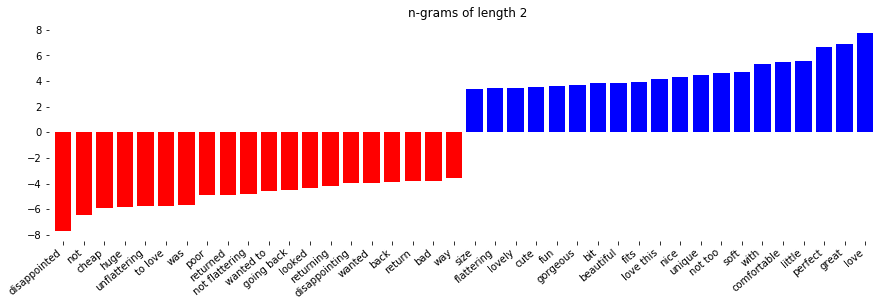

In [206]:
# Visualize ngram_range = (1,2)
plt.figure(figsize=(15, 4))
plot_important_features(lr.coef_.ravel(), np.array(tv.get_feature_names()), top_n=20, rotation=40)
plt.title("n-grams of length 2")
#ax = plt.gca()
plt.show()

In [208]:
# 3.2 Using character n-grams
tv_char = TfidfVectorizer(ngram_range=(1, 2), analyzer="char")
X_train_char = tv_char.fit_transform(text_train.values.astype('U'))
print("Vocabulary size: {}".format(len(tv_char.vocabulary_)))
lr_char = LogisticRegression(random_state =0, C= 2.7825594 ).fit(X_train_char, y_train)
score = cross_val_score(lr_char, X_train_char, y_train, cv= 5,scoring = 'roc_auc')
print ("Average AUC: {}".format(np.mean(score)))

Vocabulary size: 2002
Average AUC: 0.9129180661276785


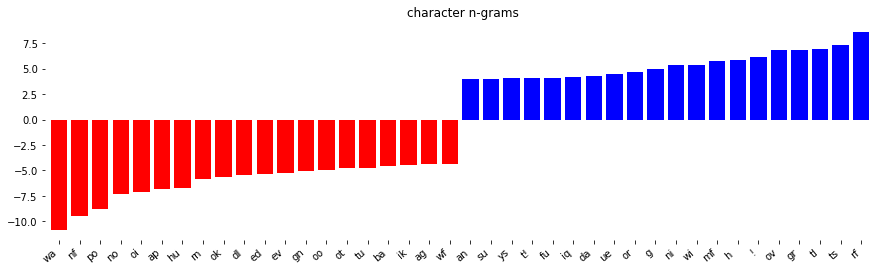

In [209]:
# Visualize ngram_range = (1,2)
plt.figure(figsize=(15, 4))
plot_important_features(lr_char.coef_.ravel(), np.array(tv_char.get_feature_names()), top_n=20, rotation=40)
plt.title("character n-grams")
#ax = plt.gca()
plt.show()

Using characters does not increase model performance and the features contain no obvious meanings. 

In [213]:
# 3.3
# min_df
param_grid = {'tfidfvectorizer__min_df': [1, 2, 3, 4, 5]} 
pipe = make_pipeline(TfidfVectorizer(encoding='utf-8'), LogisticRegression(C= 2.7825594, random_state =0 ))
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring = 'roc_auc')

grid.fit(text_train.values.astype('U'), y_train)
tv = grid.best_estimator_.named_steps['tfidfvectorizer']
print("best average AUC : {:.5f}".format(grid.best_score_))
print("best parameter: {}".format(grid.best_params_))
print("\nVocabulary size with n-grams with best min_df: {}".format(len(tv.vocabulary_)))

best average AUC : 0.94861
best parameter: {'tfidfvectorizer__min_df': 2}

Vocabulary size with n-grams with best min_df: 7478


In [214]:
# with stop words
tv = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_train_tv = tv.fit_transform(text_train.values.astype('U'))
lr = LogisticRegression(C= 2.7825594, random_state =0).fit(X_train_tv, y_train)
score = cross_val_score(lr, X_train_tv, y_train, cv= 5,scoring = 'roc_auc')
print("\nVocabulary size with n-grams with stop words: {}".format(len(tv.vocabulary_)))
print ("Average AUC: {}".format(np.mean(score)))


Vocabulary size with n-grams with stop words: 226098
Average AUC: 0.9432763385280134


Adding min_df decreases the number of features, whereas using English stop words increases the number of features. However, neither of the new models outperformed the original word 2-grams model in Task 3.1.

In [227]:
# Test with the best model
tv = TfidfVectorizer(ngram_range=(1, 2))
X_train_tv = tv.fit_transform(text_train.values.astype(str))
lr = LogisticRegression(random_state =0, C= 2.7825594).fit(X_train_tv, y_train)

X_test_tv = tv.transform(text_test.values.astype('U'))

score = roc_auc_score(y_test, lr.predict(X_test_tv))
print("Vocabulary size with word 2-grams: {}".format(len(tv.vocabulary_)))
print ("Test Average AUC: {}".format(score))

Vocabulary size with word 2-grams: 212631
Test Average AUC: 0.7935042896593706


### Task 4 Model Tuning (again) 10 Pts ###
Revisit your choice of model. Compare different linear models with L1 and L2 penalty on the best performing features from Task 3. <br>
Are there any other obvious features to try, or combinations to try out? (Don’t perform them, just list them).

Best model from task 3 uses TfidfVectorizer and word 2-grams with logistic regression. The model is default to using L2 penalty and the train average AUC is 0.954. Now we try using L1 penalty for comparison.

In [224]:
# Using l1 loss 
tv = TfidfVectorizer(ngram_range=(1, 2))
X_train_tv = tv.fit_transform(text_train.values.astype('U'))
lr = LogisticRegression(penalty='l1', random_state =0, solver = "saga", C= 2.7825594).fit(X_train_tv, y_train)
score = cross_val_score(lr, X_train_tv, y_train, cv= 5,scoring = 'roc_auc')
print("Vocabulary size with n-grams L1 penalty: {}".format(len(tv.vocabulary_)))
print ("Average AUC: {}".format(np.mean(score)))

/Users/viva2.0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/viva2.0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/viva2.0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/viva2.0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/viva2.0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma


Vocabulary size with n-grams L1 penalty: 212631
Average AUC: 0.9497389060182341


/Users/viva2.0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


A potentially helpful feature to try is setting class_weight to "balanced". We can also try the min_df for unigram and max_df for ngrams.

In [226]:
X_test_tv = tv.transform(text_test.values.astype('U'))

score = roc_auc_score(y_test, lr.predict(X_test_tv))
print("Vocabulary size with word 2-grams and logreg with l1 penalty: {}".format(len(tv.vocabulary_)))
print ("Test Average AUC: {}".format(score))

Vocabulary size with word 2-grams and logreg with l1 penalty: 212631
Test Average AUC: 0.8158862433678595
